# Detecting Fake News using NLP

### What is Fake News?

* A type of yellow journalism, fake news encapsulates pieces of news that may be hoaxes and is generally spread through social media and other online media. 
* This is often done to further or impose certain ideas and is often achieved with political agendas. 
* Such news items may contain false and/or exaggerated claims, and may end up being viralized by algorithms, and users may end up in a filter bubble.

* We have Used NLP technique for Detection of Fake News

### Features we have 

* title: the title of a news article
* text: the text of the article; could be incomplete
* label: a label that marks the article as potentially unreliable
* FAKE
* REAL

In [ ]:
# Import all the necessary libraries for our model

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import TfidfVectorizer    # Imported TFIDF
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

In [10]:
data = pd.read_csv('news.csv')            # Load the Dataset
data.head()

,Unnamed: 0,title,text,label
0,8476,You Can Smell Hillary’s Fear,"Daniel Greenfield, a Shillman Journalism Fello...",FAKE
1,10294,Watch The Exact Moment Paul Ryan Committed Pol...,Google Pinterest Digg Linkedin Reddit Stumbleu...,FAKE
2,3608,Kerry to go to Paris in gesture of sympathy,U.S. Secretary of State John F. Kerry said Mon...,REAL
3,10142,Bernie supporters on Twitter erupt in anger ag...,"— Kaydee King (@KaydeeKing) November 9, 2016 T...",FAKE
4,875,The Battle of New York: Why This Primary Matters,It's primary day in New York and front-runners...,REAL


In [11]:
data.shape # get the shape of our Dataset.


(6335, 4)

* There are 6335 Rows & 4 Columns

In [12]:
col_names = data.columns

col_names

Index(['Unnamed: 0', 'title', 'text', 'label'], dtype='object')

* Get all the columns Name which our Dataset is Having

In [13]:
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6335 entries, 0 to 6334
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  6335 non-null   int64 
 1   title       6335 non-null   object
 2   text        6335 non-null   object
 3   label       6335 non-null   object
dtypes: int64(1), object(3)
memory usage: 198.1+ KB


In [14]:
data.isnull().sum()    # Finding the null values


Unnamed: 0    0
title         0
text          0
label         0
dtype: int64

In [15]:
data.groupby('label').describe()


Unnamed: 0                                                              \
           count         mean          std     min      25%     50%      75%   
label                                                                          
FAKE      3164.0  7912.297092  1514.701524  5280.0  6627.75  7904.0  9231.25   
REAL      3171.0  2654.344056  1531.720152     2.0  1317.50  2676.0  3992.50   

                
           max  
label           
FAKE   10557.0  
REAL    5276.0

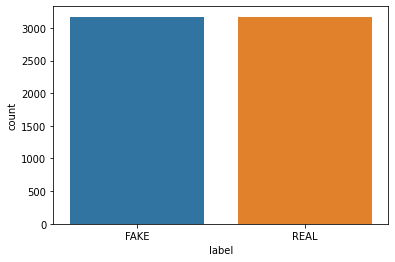

In [16]:
sns.countplot(data=data, x='label')


* CountPlot of Label which are 'Real' and 'Fake'

In [17]:
lb = {'FAKE':0, 'REAL':1}


* Here we have done label encoding of our Target variables
* 0 for FAKE
* 1 for REAL

In [18]:
data['label'] = data['label'].replace(lb)


In [19]:
data.head(5)

,Unnamed: 0,title,text,label
0,8476,You Can Smell Hillary’s Fear,"Daniel Greenfield, a Shillman Journalism Fello...",0
1,10294,Watch The Exact Moment Paul Ryan Committed Pol...,Google Pinterest Digg Linkedin Reddit Stumbleu...,0
2,3608,Kerry to go to Paris in gesture of sympathy,U.S. Secretary of State John F. Kerry said Mon...,1
3,10142,Bernie supporters on Twitter erupt in anger ag...,"— Kaydee King (@KaydeeKing) November 9, 2016 T...",0
4,875,The Battle of New York: Why This Primary Matters,It's primary day in New York and front-runners...,1


In [21]:
data.drop(['Unnamed: 0'],axis=1,inplace = True)


* 'Unnamed: 0' we have dropped 'Unnamed: 0' column which is irrelevent column

In [22]:
data.head(5)

,title,text,label
0,You Can Smell Hillary’s Fear,"Daniel Greenfield, a Shillman Journalism Fello...",0
1,Watch The Exact Moment Paul Ryan Committed Pol...,Google Pinterest Digg Linkedin Reddit Stumbleu...,0
2,Kerry to go to Paris in gesture of sympathy,U.S. Secretary of State John F. Kerry said Mon...,1
3,Bernie supporters on Twitter erupt in anger ag...,"— Kaydee King (@KaydeeKing) November 9, 2016 T...",0
4,The Battle of New York: Why This Primary Matters,It's primary day in New York and front-runners...,1


In [23]:
data.shape

(6335, 3)

In [28]:
data['title'].head(5)

0                         You Can Smell Hillary’s Fear
1    Watch The Exact Moment Paul Ryan Committed Pol...
2          Kerry to go to Paris in gesture of sympathy
3    Bernie supporters on Twitter erupt in anger ag...
4     The Battle of New York: Why This Primary Matters
Name: title, dtype: object

In [29]:
data.drop(['title'],axis=1,inplace = True)


* We have dropped 'title' column as well

In [30]:
data.shape

(6335, 2)

In [31]:
X = data.drop('label', axis=1)    

y = data['label']        # Target Variable

* Here we will do Preprocessing with our Data

* 1) First we are going to convert all the text data into Lower case
* 2) Then we are going to remove 'Stop key Words' from our dataset

In [43]:
from nltk.stem.porter import PorterStemmer
from nltk.corpus import stopwords
import re

ps = PorterStemmer()
corpus = []

for i in range(0,len(X)):
	review = re.sub('[^a-zA-Z]',' ', X['text'][i])
	review = review.lower()
	review = review.split()
	
	review = [ps.stem(word) for word in review if not word in stopwords.words('english')]
	review = ' '.join(review)
	corpus.append(review)

In [47]:
corpus[0]

'daniel greenfield shillman journal fellow freedom center new york writer focus radic islam final stretch elect hillari rodham clinton gone war fbi word unpreced thrown around often elect ought retir still unpreced nomine major polit parti go war fbi exactli hillari peopl done coma patient wake watch hour cnn hospit bed would assum fbi director jame comey hillari oppon elect fbi attack everyon obama cnn hillari peopl circul letter attack comey current media hit piec lambast target trump surpris clinton alli start run attack ad fbi fbi leadership warn entir left wing establish form lynch mob continu go hillari fbi credibl attack media democrat preemptiv head result investig clinton foundat hillari clinton covert struggl fbi agent obama doj peopl gone explos public new york time compar comey j edgar hoover bizarr headlin jame comey role recal hoover fbi fairli practic admit front spout nonsens boston globe publish column call comey resign outdon time editori claim scandal realli attack w

In [48]:
from sklearn.feature_extraction.text import TfidfVectorizer    # Imported TFIDF
from sklearn.ensemble import RandomForestClassifier

### What is a TfidfVectorizer?
* TF (Term Frequency): The number of times a word appears in a document is its Term Frequency. 
* A higher value means a term appears more often than others, and so, the document is a good match when the term is part of the search terms.

* IDF (Inverse Document Frequency): Words that occur many times a document, but also occur many times in many others, may be irrelevant. 
* IDF is a measure of how significant a term is in the entire corpus.

* The TfidfVectorizer converts a collection of raw documents into a matrix of TF-IDF features.

In [49]:
#implement TF-IDF
tfvector=TfidfVectorizer(ngram_range=(2,3))

train_df=tfvector.fit_transform(corpus)

* Split Datset into Training & Testing

In [52]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(train_df, y, test_size=0.2, random_state=42)

### Now Lets first try with Decision Tree classifier

In [51]:
from sklearn.tree import DecisionTreeClassifier      # Import Decision Tree algorithm library

In [53]:
classifier= DecisionTreeClassifier(criterion='entropy', random_state=0)  
classifier.fit(X_train, y_train)           # Fit Decision Tree algorithm with our Dataset for Training.

DecisionTreeClassifier(criterion='entropy', random_state=0)

In [54]:
# print the scores on training and test set

print('Training set score: {:.4f}'.format(classifier.score(X_train, y_train)))

print('Test set score: {:.4f}'.format(classifier.score(X_test, y_test)))

Training set score: 1.0000
Test set score: 0.8224


* Using Decision Tree classifier we got 100 % Training Accuracy & 82 % Testing Accuracy .
* But from this info. we can say that our Model with Decision Tree classifier is OverFitted.

### Random Forest Classifier without HyperParameter Tunning

In [55]:
from sklearn.ensemble import RandomForestClassifier        # Import Random Forest Algorithm library

In [56]:
ran_classifier = RandomForestClassifier(random_state=6)    # Load Random Forest algorithm

In [58]:
ran_classifier.fit(X_train,y_train)                        # Fit Random Forest algorithm with our Dataset for Training.

RandomForestClassifier(random_state=6)

In [59]:
# print the scores on training and test set

print('Training set score: {:.4f}'.format(ran_classifier.score(X_train, y_train)))

print('Test set score: {:.4f}'.format(ran_classifier.score(X_test, y_test)))

Training set score: 1.0000
Test set score: 0.8895


* Using Random Forest classifier we got 100 % Training Accuracy & 88 % Testing Accuracy .
* Now we can see by changing an Algorithm we have improved a Testing Accuracy.

### Lets check performance of Model

In [62]:
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score


In [63]:
predictions = ran_classifier.predict(X_test)


In [64]:
matrix=confusion_matrix(y_test,predictions)
print(matrix)
score=accuracy_score(y_test,predictions)
print(score)
report=classification_report(y_test,predictions)
print(report)

[[608  20]
 [120 519]]
0.8895027624309392
              precision    recall  f1-score   support

           0       0.84      0.97      0.90       628
           1       0.96      0.81      0.88       639

    accuracy                           0.89      1267
   macro avg       0.90      0.89      0.89      1267
weighted avg       0.90      0.89      0.89      1267



### MultinomialNB

In [65]:
from sklearn.naive_bayes import MultinomialNB
nb = MultinomialNB()


In [66]:
nb.fit(X_train,y_train)

MultinomialNB()

In [67]:
predictions = nb.predict(X_test)
matrix=confusion_matrix(y_test,predictions)
print(matrix)
score=accuracy_score(y_test,predictions)
print(score)
report=classification_report(y_test,predictions)
print(report)

[[521 107]
 [  9 630]]
0.9084451460142068
              precision    recall  f1-score   support

           0       0.98      0.83      0.90       628
           1       0.85      0.99      0.92       639

    accuracy                           0.91      1267
   macro avg       0.92      0.91      0.91      1267
weighted avg       0.92      0.91      0.91      1267



In [68]:
from sklearn.linear_model import PassiveAggressiveClassifier
pa = PassiveAggressiveClassifier()

In [69]:
pa.fit(X_train,y_train)

PassiveAggressiveClassifier()

In [70]:
predictions = pa.predict(X_test)
matrix=confusion_matrix(y_test,predictions)
print(matrix)
score=accuracy_score(y_test,predictions)
print(score)
report=classification_report(y_test,predictions)
print(report)

[[598  30]
 [ 70 569]]
0.9210734017363852
              precision    recall  f1-score   support

           0       0.90      0.95      0.92       628
           1       0.95      0.89      0.92       639

    accuracy                           0.92      1267
   macro avg       0.92      0.92      0.92      1267
weighted avg       0.92      0.92      0.92      1267

